In [1]:
teachers = pd.read_csv('../data/teachers.csv')
students = pd.read_csv('../data/students.csv')
sessions = pd.read_csv('../data/sessions.csv')
schools = pd.read_csv('../data/schools.csv')
posts = pd.read_csv('../data/posts.csv')
planning_events = pd.read_csv('../data/planning_events.csv')
child_posts = pd.read_csv('../data/child_posts.csv')
classrooms = pd.read_csv('../data/classrooms.csv')
lesson_posts = pd.read_csv('../data/lesson_posts.csv')
parents = pd.read_csv('../data/parents.csv')
sessions['start_date'] = pd.to_datetime(sessions['start_date'])
sessions['stop_date'] = pd.to_datetime(sessions['stop_date'])
sessions['exists']=1
posts['exists']=1
posts['new_date'] = pd.to_datetime(posts.date, errors='coerce')

## Sessions analysis

In [2]:
sessions.head()

,id,current,start_date,stop_date,name,school_id,inactive,exists
0,1,f,2012-01-03,2012-06-20,2011-12,2,f,1
1,2,f,2012-06-25,2012-08-17,Summer 2012,2,f,1
2,6,f,2013-09-01,2014-07-01,2013-14,3,f,1
3,3,f,2012-09-04,2013-06-19,2012-13,2,f,1
4,4,f,2012-09-01,2013-06-30,2012-13,3,f,1


In [3]:
# churners:
sum(sessions.groupby('school_id')['stop_date'].max()<pd.to_datetime('april 28, 2018'))

14

In [4]:
sum(sessions['stop_date']<pd.to_datetime('april 28, 2018'))

1973

Text(0.5,1,'school_id start/stop dates')

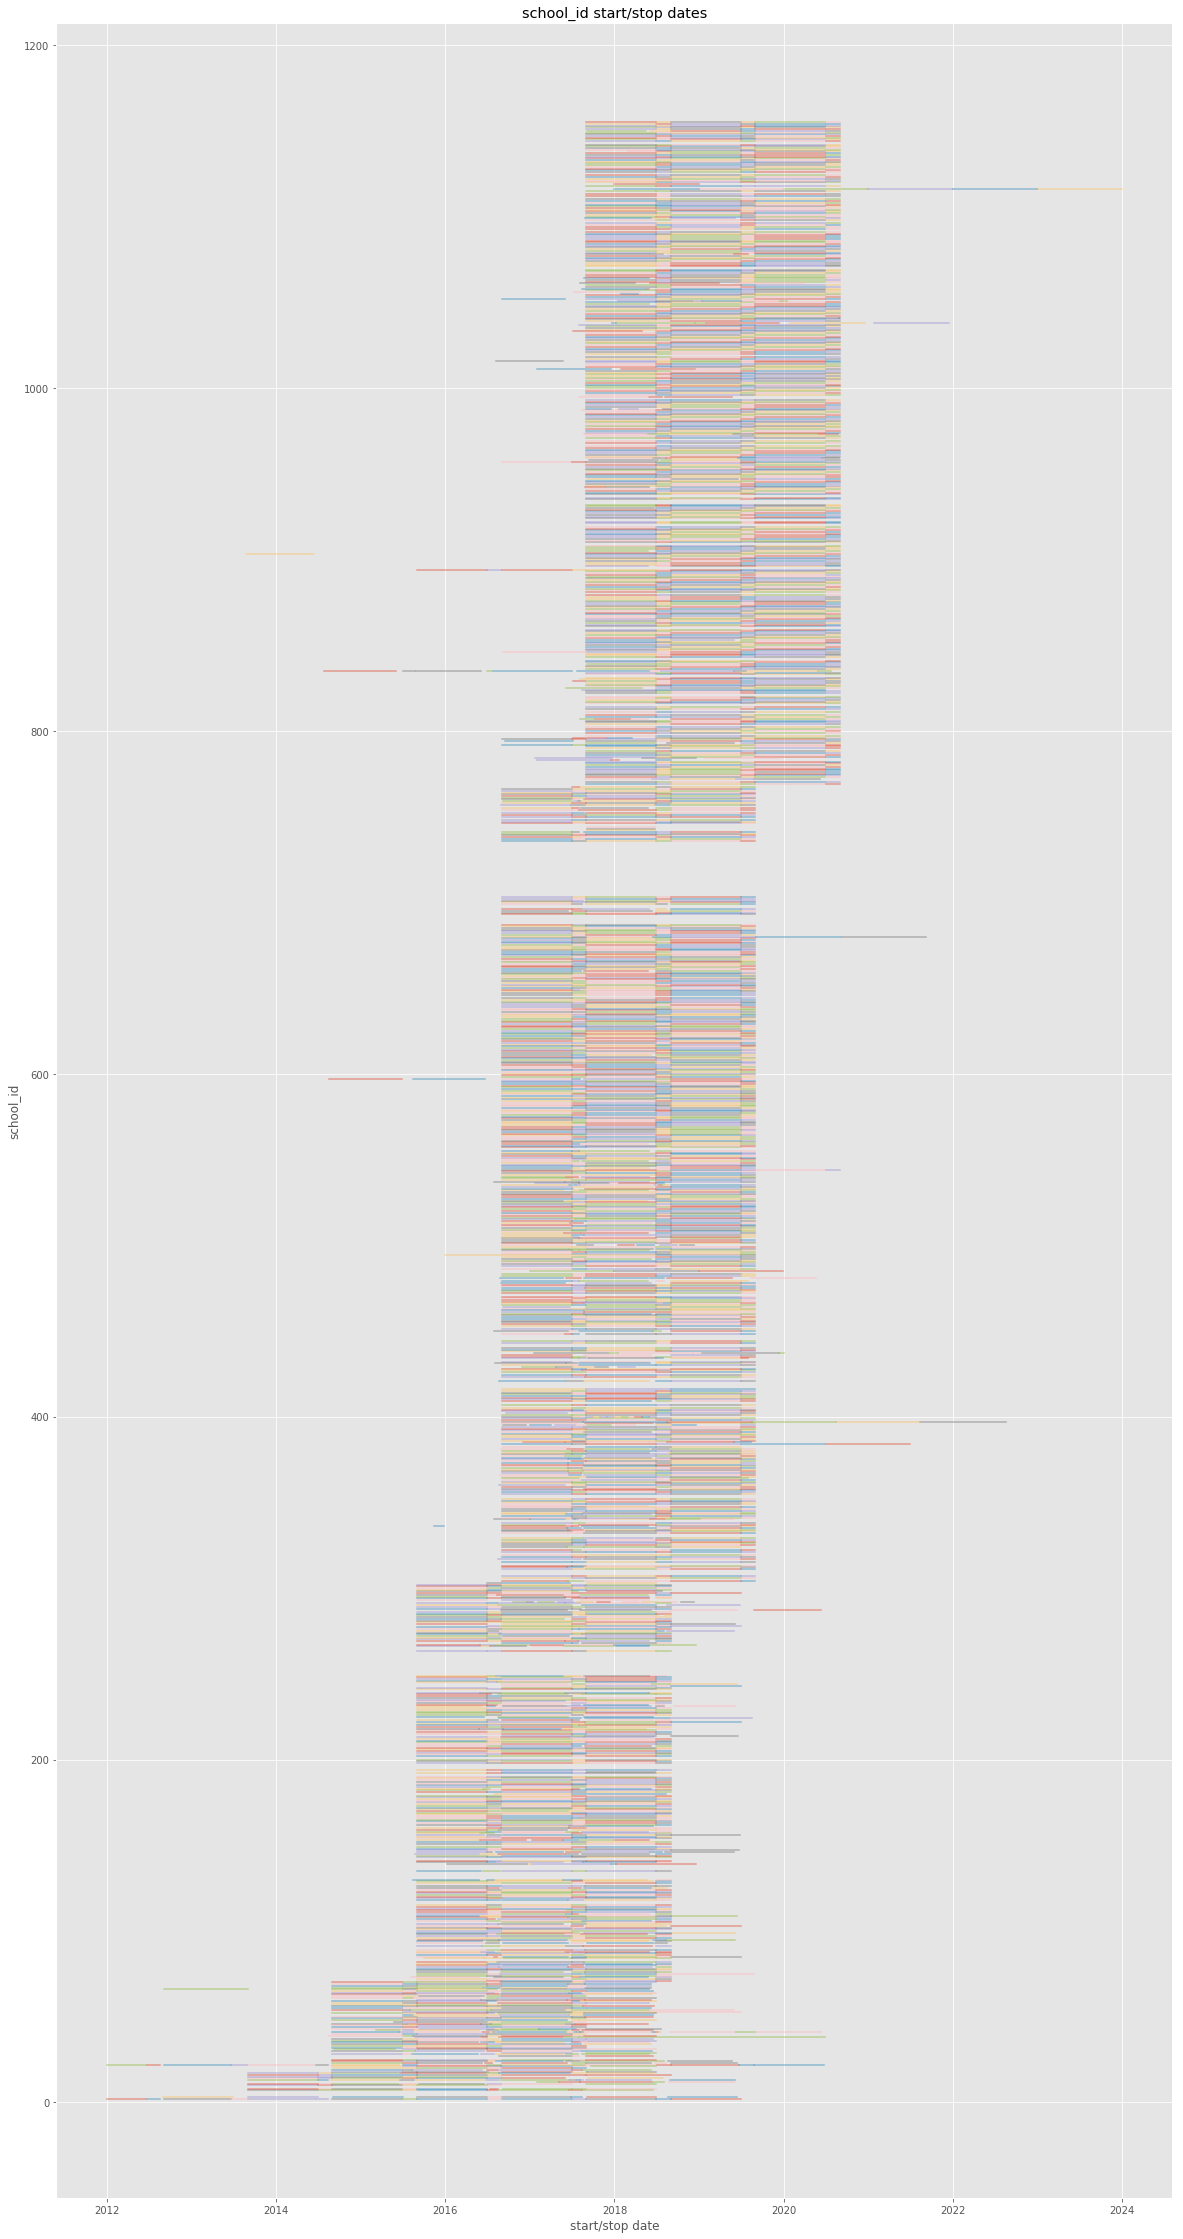

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20,40))
point_pairs = [((sessions.start_date[i],sessions.stop_date[i]),(sessions.school_id[i],sessions.school_id[i])) for i in range(len(sessions))]
# point_pairs = [((sessions.start_date[i],sessions.stop_date[i]),(sessions.school_id[i],sessions.school_id[i])) for i in range(100)]
for x in point_pairs:
    ax.plot(x[0], x[1], alpha=.5)
ax.set_xlabel('start/stop date')
ax.set_ylabel('school_id')
ax.set_title('school_id start/stop dates')

In [6]:
sessions.start_date[0]

Timestamp('2012-01-03 00:00:00')

In [7]:
sessions.groupby('start_date').sum().head(5)
sum_sessions_date_indexed = sessions.groupby('start_date').sum()
sum_sessions_date_indexed['exists'] = np.log(sum_sessions_date_indexed['exists'])
sum_sessions_date_indexed[sum_sessions_date_indexed['school_id']==465]['exists']
sum_sessions = sum_sessions_date_indexed.reset_index()
sum_sessions.head()

,start_date,id,school_id,exists
0,2012-01-03,4596,24,0.693147
1,2012-06-25,4598,24,0.693147
2,2012-09-01,4,3,0.000000
3,2012-09-04,6662,90,1.098612
4,2013-06-20,4606,24,0.693147


max stop = 2023-12-31 00:00:00
max start = 2023-01-01 00:00:00
min stop = 2012-06-20 00:00:00
min start = 2012-01-03 00:00:00


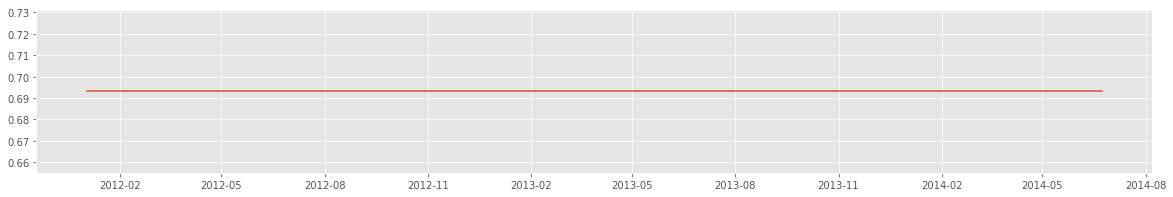

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,3))
ax.plot(sum_sessions[sum_sessions['school_id']==24]['start_date'], sum_sessions[sum_sessions['school_id']==24]['exists'])
sessions.describe()
print('max stop = ' + str(sessions.stop_date.max()))
print('max start = ' + str(sessions.start_date.max()))
print('min stop = ' + str(sessions.stop_date.min()))
print('min start = ' + str(sessions.start_date.min()))

In [9]:
sessions.head(3)

,id,current,start_date,stop_date,name,school_id,inactive,exists
0,1,f,2012-01-03,2012-06-20,2011-12,2,f,1
1,2,f,2012-06-25,2012-08-17,Summer 2012,2,f,1
2,6,f,2013-09-01,2014-07-01,2013-14,3,f,1


school_id
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
Name: exists, dtype: object

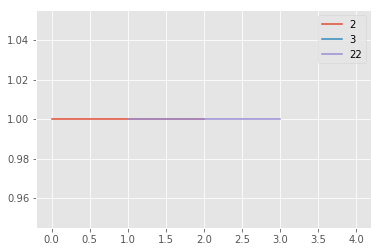

In [10]:
sessions_grouped = sessions[['start_date','school_id','exists']].groupby(['start_date','school_id']).sum().reset_index().head()
# sessions_grouped.set_index('start_date', inplace=True)
sessions_grouped.groupby('school_id')['exists'].plot(legend=True)

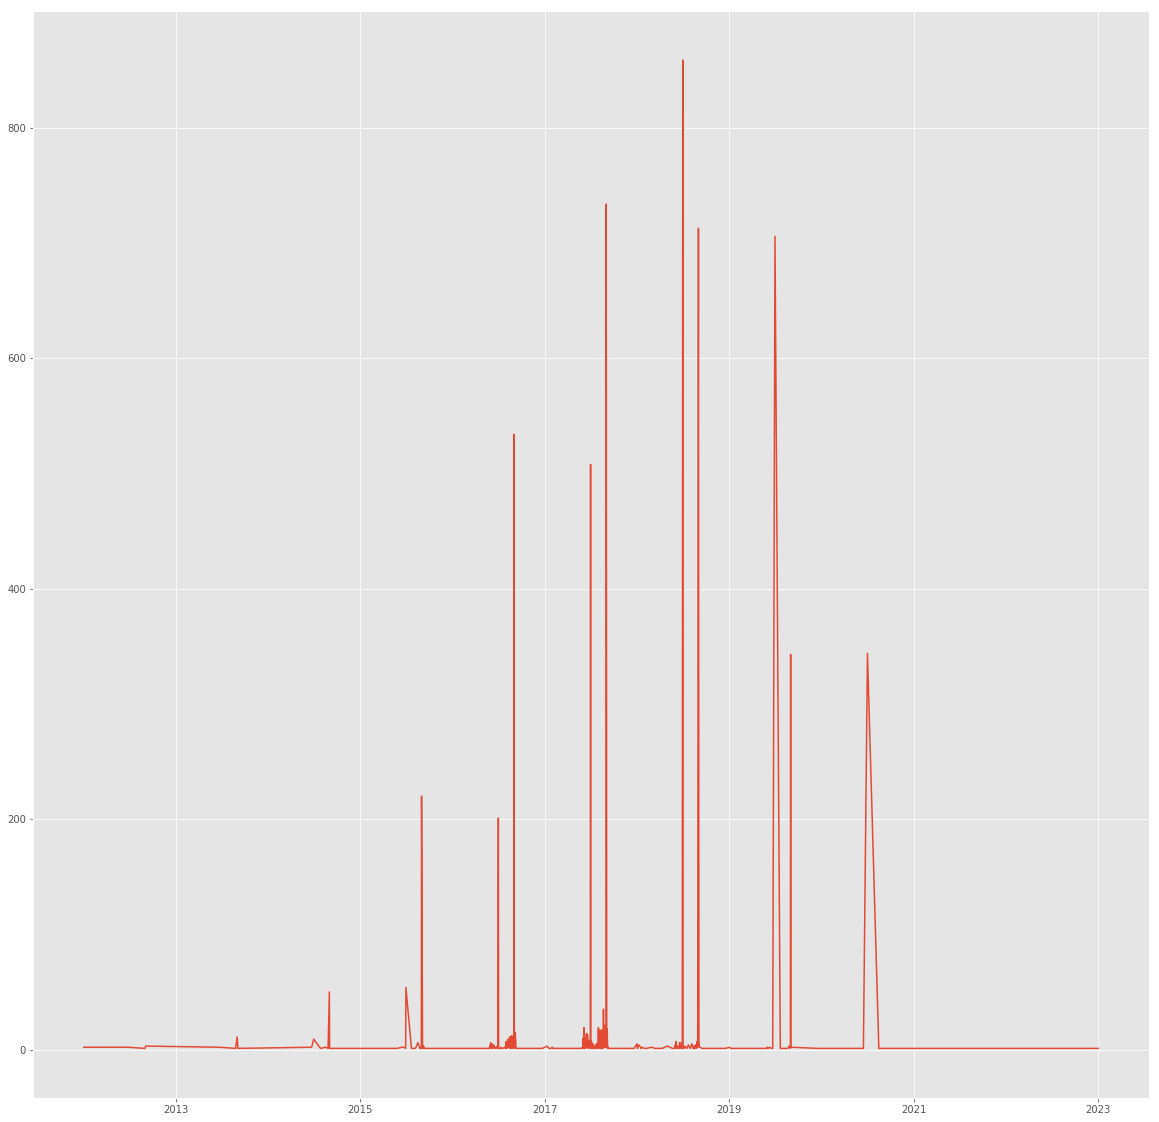

In [11]:
fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.plot(sessions[['exists','start_date']].groupby('start_date').sum());

## Posts analysis

In [ ]:
posts.describe()

In [ ]:
sorted_post_date = posts.date.sort_values()

In [16]:
# # posts.date.dtypes
# # posts.date.apply(lambda x: not isinstance(x, pd.Timestamp))
# sorted_post_date.iloc[-170:]
# # posts.date.dtypes
# posts['new_date'] = pd.to_datetime(posts.date, errors='coerce')
# # len(posts.date)
# # posts.date>'2018-12-12'

In [17]:
print(posts.new_date.max())
print(posts.new_date.min())

2020-08-24 00:00:00
1908-10-09 00:00:00


In [19]:
# posts['exists']=1
# posts.head(3)

In [ ]:
posts[['new_date','classroom_id','exists']].groupby(['classroom_id', 'new_date']).sum().plot();

In [ ]:
posts[['new_date','classroom_id','exists']].groupby(['classroom_id', 'new_date']).sum()

In [ ]:
sum_post = posts[['new_date','classroom_id','exists']].groupby(['classroom_id', 'new_date']).sum()
sum_post['exists'] = np.log(sum_post['exists'])
sum_post = sum_post.reset_index()
sum_post_date_indexed = sum_post.copy()
sum_post_date_indexed.set_index('new_date',inplace=True)
# plt.plot(sum_post[sum_post['classroom_id']==1])
# plt.scatter(sum_post[sum_post['classroom_id']==1][new_date], sum_post[sum_post['classroom_id']==1]['exists'])

In [ ]:
sum_post[sum_post['classroom_id']==3]

In [ ]:
sum_post['classroom_id'].value_counts()[60:61]
sum_post.head()

In [ ]:
# plt.plot(sum_post[sum_post['classroom_id']==1]);
np.exp(5)

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,3))
ax[0].scatter(sum_post[sum_post['classroom_id']==77]['new_date'].values,sum_post[sum_post['classroom_id']==77]['exists'])
ax[1].plot(sum_post[sum_post['classroom_id']==77]['new_date'],sum_post[sum_post['classroom_id']==77]['exists']);
ax[0].set_title("Class 77 log(posts)")

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,3))
ax[0].scatter(sum_post[sum_post['classroom_id']==852]['new_date'].values,sum_post[sum_post['classroom_id']==852]['exists'])
ax[1].plot(sum_post[sum_post['classroom_id']==852]['new_date'],sum_post[sum_post['classroom_id']==852]['exists']);
ax[0].set_title("Class 852 log(posts)")

In [ ]:
classroom_id = 51
for classroom_id in sum_post['classroom_id'].unique()[0:30]:
    fig, ax = plt.subplots(2,1, figsize=(20,3))
    ax[0].scatter(sum_post[sum_post['classroom_id']==classroom_id]['new_date'].values,sum_post[sum_post['classroom_id']==classroom_id]['exists'])
    ax[1].plot(sum_post[sum_post['classroom_id']==classroom_id]['new_date'],sum_post[sum_post['classroom_id']==classroom_id]['exists']);
    ax[0].set_title(f"Class {classroom_id} log(posts)")
    plt.show()

## Peek at all data:

In [48]:
posts.head()

,id,date,classroom_id,picture_file_name,private,exists,new_date
0,4319418,2018-01-25,1684,NaN,f,1,2018-01-25
1,4319419,2018-01-25,1684,NaN,f,1,2018-01-25
2,4319420,2018-01-25,1684,NaN,f,1,2018-01-25
3,4319421,2018-01-25,1684,NaN,f,1,2018-01-25
4,4319422,2018-01-25,1684,NaN,f,1,2018-01-25


In [ ]:
planning_events.head(3)

In [47]:
classrooms.head(10)

,id,school_id,lesson_set_id,inactive,classroom_type
0,2650,855,1281,f,Primary
1,174,48,126,t,Primary
2,2645,862,1276,f,Lower Elementary
3,3183,968,1563,f,Infant
4,3680,224,306,f,Primary
5,256,80,162,f,Lower Elementary
6,3190,969,1566,f,Primary
7,2599,220,1253,f,Lower Elementary
8,3184,968,1563,f,Infant
9,3675,1099,1847,f,Infant


In [ ]:
teachers.head(10)

In [ ]:
students.head()

In [ ]:
schools.head(5)

In [20]:
lesson_posts.head(3)

,lesson_id,post_id
0,17689,472955
1,17690,472955
2,17737,472955


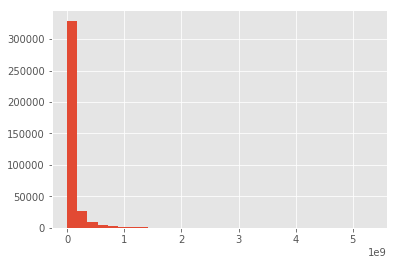

In [28]:
plt.hist(lesson_posts.groupby('lesson_id').sum()['post_id'], bins=30);

In [ ]:
child_posts.head(3)

## Combine data into one dataframe for analysis:

In [41]:
posts = pd.read_csv('../data/posts.csv')
posts['exists']=1
posts['new_date'] = pd.to_datetime(posts.date, errors='coerce')

In [42]:
print(len(posts))
posts.head()

4584013


,id,date,classroom_id,picture_file_name,private,exists,new_date
0,4319418,2018-01-25,1684,NaN,f,1,2018-01-25
1,4319419,2018-01-25,1684,NaN,f,1,2018-01-25
2,4319420,2018-01-25,1684,NaN,f,1,2018-01-25
3,4319421,2018-01-25,1684,NaN,f,1,2018-01-25
4,4319422,2018-01-25,1684,NaN,f,1,2018-01-25


In [43]:
posts_merge = posts.merge(classrooms,how='left', left_on='classroom_id', right_on='id')
posts_merge['post_id']=posts_merge['id_x']
print(len(posts_merge))
posts_merge

4584013


,id_x,date,classroom_id,picture_file_name,private,exists,new_date,id_y,school_id,lesson_set_id,inactive,classroom_type,post_id
0,4319418,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319418
1,4319419,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319419
2,4319420,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319420
3,4319421,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319421
4,4319422,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319422
5,4376681,2018-01-29,2859,20180129142656_5863f9e3-d886-4071-807c-8af9db3...,f,1,2018-01-29,2859,544,1558,f,Preschool,4376681
6,4376671,2018-01-29,2859,20180129142656_5863f9e3-d886-4071-807c-8af9db3...,f,1,2018-01-29,2859,544,1558,f,Preschool,4376671
7,4376672,2018-01-26,2859,20180129142656_5863f9e3-d886-4071-807c-8af9db3...,f,1,2018-01-26,2859,544,1558,f,Preschool,4376672
8,4376683,2018-01-29,2427,20180129133055_2d125c6c-580c-456f-9220-72632d5...,f,1,2018-01-29,2427,823,1178,f,Infant,4376683
9,522797,2016-09-09,338,Henry_D.jpg,f,1,2016-09-09,338,103,212,f,Preschool/Kindergarten,522797


In [44]:
posts_merge = posts_merge.merge(child_posts.groupby(,how='left', left_on='id_x', right_on='post_id')
print(len(posts_merge))
posts_merge.head(3)

13805957


,id_x,date,classroom_id,picture_file_name,private,exists,new_date,id_y,school_id,lesson_set_id,inactive,classroom_type,post_id_x,child_id,post_id_y
0,4319418,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319418,1301209.0,4319418.0
1,4319418,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319418,1301210.0,4319418.0
2,4319418,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319418,1301211.0,4319418.0


In [45]:
# posts_merge.drop('id_x', axis=1)

In [46]:
posts_merge=posts_merge.merge(lesson_posts, how='left', left_on='id_x', right_on='post_id')
print(len(posts_merge))
posts_merge.head(3)

118817493


,id_x,date,classroom_id,picture_file_name,private,exists,new_date,id_y,school_id,lesson_set_id,inactive,classroom_type,post_id_x,child_id,post_id_y,lesson_id,post_id
0,4319418,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319418,1301209.0,4319418.0,1301209.0,4319418.0
1,4319418,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319418,1301209.0,4319418.0,1301210.0,4319418.0
2,4319418,2018-01-25,1684,NaN,f,1,2018-01-25,1684,437,914,f,Lower Elementary,4319418,1301209.0,4319418.0,1301211.0,4319418.0


In [40]:
len(posts_merge)
# posts_merge.head(10)

118817493

In [ ]:
posts_merge=posts_merge.merge(teachers, how='left', left_on='classroom_id', right_on='default_classroom_id')
posts_merge.head(3)

In [ ]:
posts_merge = posts_merge.merge(students, how='left', left_on='child_id', right_on='child_id')
posts_merge.head(3)

In [ ]:
posts_merge.current_student = posts_merge.current
posts_merge.drop('current', axis=1)
posts_merge.head(3)

In [ ]:
posts_merge = posts_merge.merge(planning_events, how='left', left_on)
posts_merge.head(3)

## Combine planning_events into one dataframe for analysis:

In [ ]:
planning_events.created_at = pd.to_datetime(planning_events.created_at)

In [ ]:
planning_events['created_at'].apply(lambda x: isinstance(x, pd.Timestamp))

In [ ]:
planning_events

## Make hist of posts in last 30 days

In [ ]:
np.exp(5)

In [ ]:
np.exp(2)

In [ ]:
# posts['new_date']=pd.to_datetime(posts['date'])

In [ ]:
posts.head(3)

In [ ]:
plt.hist(num_posts_by_class['exists'], bins=100);

In [ ]:
plt.hist(np.log(num_posts_by_class['exists']), bins=100);

In [ ]:
plt.hist(num_posts_by_class)

### Num posts in the last X days

In [ ]:
last_month_posts_total[last_month_posts_total["exists_last_month_posts"]>0]

In [ ]:
def posts_since(posts,date):
    last_month_posts = posts[posts['new_date']>date].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    plt.hist(last_month_posts_total['exists_last_month_posts'],bins=40)

def log_posts_since(posts,date):
    last_month_posts = posts[posts['new_date']>date].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    plt.hist(np.log(last_month_posts_total['exists_last_month_posts']+1),bins=40)
posts_since(posts, pd.to_datetime("Feb 15 2018"))

In [ ]:
plt.hist(np.log(last_month_posts_total['exists_last_month_posts']+1),bins=30);

In [ ]:
last_month_posts_total['exists_last_month_posts'].head(5)

In [ ]:
posts_since(posts, pd.to_datetime("Feb 15 2011"))

In [ ]:
posts_since(posts, pd.to_datetime("Jan 15 2018"))

In [ ]:
log_posts_since(posts, pd.to_datetime("jan 15 2018"))

In [ ]:
log_posts_since(posts, pd.to_datetime("feb 15 2018"))

In [ ]:
sums_class_in_last_month = sum_post[sum_post['new_date']>pd.to_datetime("Feb 15 2018")].groupby('classroom_id').count()[:100]
sums_class_in_last_month.head(5)

### Num of days (in last month) with > 0 posts

In [ ]:
def days_with_one_post_since(posts, date):
    days_one_post_in_last_month = posts[posts['new_date']> date].groupby(['classroom_id','new_date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    plt.hist(days_one_post_in_last_month['exists_days_one_post_in_last_month'],bins=30);
    
def log_days_with_one_post_since(posts, date):
    days_one_post_in_last_month = posts[posts['new_date']> date].groupby(['classroom_id','new_date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    plt.hist(np.log(days_one_post_in_last_month['exists_days_one_post_in_last_month']+1),bins=30);
days_with_one_post_since(posts, pd.to_datetime("feb 15 2018"))

In [ ]:
log_days_with_one_post_since(posts, pd.to_datetime("feb 15 2018"))

In [ ]:
days_with_one_post_since(posts, pd.to_datetime("feb 15 2011"))

In [ ]:
log_days_with_one_post_since(posts, pd.to_datetime("feb 15 2011"))

## Hearts

In [ ]:
sum(posts[posts['classroom_id']==4]['new_date']>pd.to_datetime('feb 15 2018'))

In [ ]:
sum(posts[posts['classroom_id']==4]['new_date']>pd.to_datetime('feb 15 2018'))

### in the last 90 days:
one <3 rewarded if:
1. the min of last three # posts/month is greater than 50
2. the min of last three # posts/month is greater than 200
3. the min of least month is greater than zero
4. the min of least WEEK is greater than zero (so one post every week) 
5. the least month is more than a fourth of the greatest month. (again, over the last three months)

In [ ]:
self.record_keeping_quantity_1 = month_min >= 50
self.record_keeping_quantity_2 = month_min >= 200
self.record_keeping_frequency_1 = month_min > 0
self.record_keeping_frequency_2 = week_min > 0
self.record_keeping_consistency = month_max && month_max < month_min * 4